We will create a class-based perceptron that will serve us in distinguishing between my initials, P and D. We will extract the letters in a size of 28x28 from the EMNIST dataset available on Kaggle.

https://www.kaggle.com/datasets/crawford/emnist

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

class Perceptron:
    def __init__(self, n):
        self.w = np.random.uniform(-0.1, 0.1, n)
        self.n = n

    def predict(self, x):
        activation = np.dot(x,self.w)
        return 16 if activation >=0 else 4
    
    def train(self, xx, d, eta, tol):
        error_sum = float('inf')
        while error_sum > tol:
            error_sum=0
            for i in range(len(xx)):
                x = np.array(xx[i])
                y = self.predict(x)
                if y == 4  and d[i] == 16:
                    self.w = self.w + eta*x
                elif y == 16 and d[i] == 4:
                    self.w = self.w - eta*x

                error = abs(y - d[i])
                error_sum += error
        return self.w
    
    def test(self, xx):
        predictions=[]
        for i in range(len(xx)):
            x = np.array(xx[i])
            y = self.predict(x)
            predictions.append(y)
            
        return predictions

In [4]:
testing_letter = np.array(pd.read_csv('emnist-letters-test.csv'))
training_letter = np.array(pd.read_csv('emnist-letters-train.csv'))

In [5]:
testing_letter.shape

(14799, 785)

In [6]:
X_testing_letter = testing_letter[:,1:]
y_testing_letter = testing_letter[:,0]
X_training_letter = training_letter[:,1:]
y_training_letter = training_letter[:,0]

In [7]:
indices_train = np.where((y_training_letter == 16) | (y_training_letter == 4))[0]
indices_test = np.where((y_testing_letter == 16) | (y_testing_letter == 4))[0]

train_X_pd = X_training_letter[indices_train]
train_y_pd = y_training_letter[indices_train]

test_X_pd = X_testing_letter[indices_test]
test_y_pd = y_testing_letter[indices_test]

In [8]:
test_y_pd.shape

(1600,)

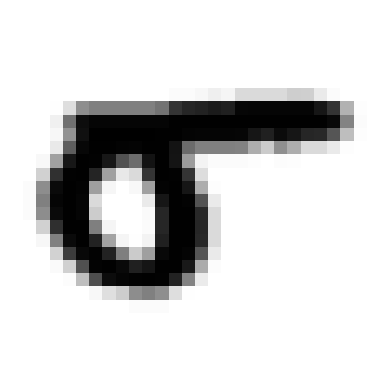

In [9]:
plt.imshow(255-test_X_pd[1110].reshape(28,28), cmap='gray') #plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

In [10]:
Perceptron1= Perceptron(n=784)

In [11]:
Perceptron1.train(train_X_pd,train_y_pd,.5,100)

array([-3.74918319e-02,  8.25797787e-02, -3.06657447e-02,  7.45670994e-02,
       -7.11765807e-02,  5.29884143e-02,  5.98567412e+02,  1.20649633e+03,
        5.88902583e+02,  3.60403273e-02,  6.97061708e-04,  8.96347263e-02,
        6.96707554e-02,  7.79092988e-02,  5.73623667e-02, -2.83596787e-02,
       -2.88489568e-02,  9.42004532e-02,  7.18884562e-02,  3.67908496e-02,
        4.56079711e-02,  8.16391956e-03,  9.84456345e-02, -6.77764420e-02,
        6.69838884e-02,  3.49138708e-02,  8.98456517e-02, -9.56707797e-02,
        3.73203345e-02,  4.12328781e-01,  1.45583948e+01,  1.37045895e+02,
        9.74051737e+02,  2.17493542e+03,  3.78843636e+03,  3.51098075e+03,
        9.80466216e+02,  1.11503388e+03,  1.14147779e+03,  1.07076788e+02,
       -3.21090772e+02, -8.90239402e+01, -2.30924782e+02, -5.06061567e+02,
       -4.94099735e+02, -4.33061343e+02, -5.65914017e+02, -2.87505508e+02,
       -2.76508518e+02, -7.95024757e+02, -8.03959893e+02,  7.60064702e+02,
        9.71003881e+02,  

In [12]:
predictions = Perceptron1.test(test_X_pd)

<Axes: >

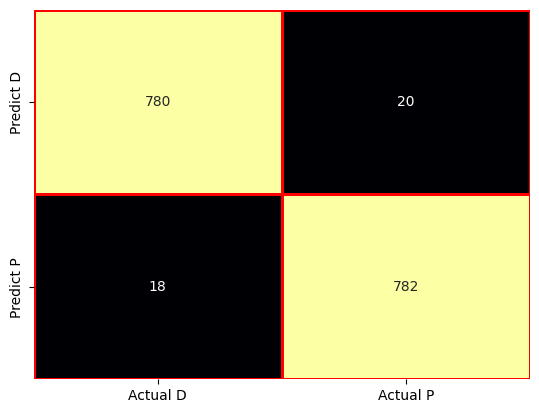

In [13]:
cm = confusion_matrix(test_y_pd,predictions)

sns.heatmap(cm, annot=True, fmt="d", cmap="inferno", xticklabels=['Actual D', 'Actual P'], 
            yticklabels=['Predict D', 'Predict P'],lw=1,cbar=False,linecolor='red')